In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re


warnings.filterwarnings('ignore')


In [2]:
train = pd.read_csv("../../dataset/processed/390k.csv" )
train.drop(["Unnamed: 0"], axis=1, inplace=True)
train.head()

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,...,has_secondary_use,type_of_reinforcement_concrete,residential_type,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,2.0,1.0,256 ft^2,22.0,Flat,Bamboo or Timber,Bamboo/Timber Light roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,0.0,Non-residential,Non-public,Non-industrial,Non-govermental,unavailable,0.0,0.0,1.0
1,3.0,3.0,985 ft^2,18.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,0.0,Non-residential,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
2,2.0,7.0,NaN,14.0,Flat,Mud mortar-Stone/Brick,NaN,Clay,Wood-Mud or Bamboo Mud,Not attached,...,0.0,0.0,Non-residential,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
3,2.0,18.0,185 ft^2,15.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,0.0,Non-residential,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4.0
4,2.0,22.0,290 ft^2,17.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Bamboo or Timber Light roof,Clay,Timber Mud or Bamboo-Mud,Not attached,...,0.0,0.0,Non-residential,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,1.0


In [13]:
train.isnull().sum()

floors_before_eq (total)              0
old_building                          0
plinth_area (ft^2)                88402
height_before_eq (ft)                 0
land_surface_condition                0
type_of_foundation                    0
type_of_roof                      88402
type_of_ground_floor                  0
type_of_other_floor                   0
position                              0
building_plan_configuration           0
legal_ownership_status                0
has_secondary_use                     0
type_of_reinforcement_concrete        0
residential_type                      0
public_place_type                     0
industrial_use_type                   0
govermental_use_type                  0
flexible_superstructure               0
wall_binding                          0
wall_material                         0
damage_grade                          0
dtype: int64

In [3]:
def clear_plinth_area(x):
    if pd.isna(x):
        return x
    else:
        sentences = re.sub('[ ft^2]', '', x)
        try:
            sentences = int(sentences)
        except:
            sentences = 1001
        return sentences*0.3048

train["plinth_area (ft^2)"] = train["plinth_area (ft^2)"].apply(clear_plinth_area)
train["plinth_area (ft^2)"].value_counts()


91.4400     10937
137.1600     8455
121.9200     7913
0.0000       7788
12.1920      7758
            ...  
279.5016        2
286.2072        2
242.9256        2
292.3032        1
295.9608        1
Name: plinth_area (ft^2), Length: 730, dtype: int64

In [4]:
plinth_area_test = train[train["plinth_area (ft^2)"].isna(
)][["floors_before_eq (total)", "plinth_area (ft^2)", "height_before_eq (ft)"]]
plinth_area_test.head()
plinth_area_train = train[train["plinth_area (ft^2)"].notna(
)][["floors_before_eq (total)", "plinth_area (ft^2)", "height_before_eq (ft)"]]

In [5]:
from sklearn.model_selection import train_test_split

X = plinth_area_train[["floors_before_eq (total)", "height_before_eq (ft)"]]
y = plinth_area_train["plinth_area (ft^2)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print(X_train.shape)
print(X_test.shape)


(241285, 2)
(60322, 2)


In [6]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

xgb = XGBRegressor()

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  72.80414949704749


In [14]:
xgb = XGBRegressor()

xgb.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

,floors_before_eq (total),height_before_eq (ft)
2,2.0,14.0
5,2.0,16.0
10,2.0,18.0
13,2.0,19.0
14,3.0,22.0
...,...,...
390004,2.0,12.0
390005,3.0,18.0
390006,3.0,21.0
390007,1.0,6.0


In [17]:
y_pred_all = xgb.predict(plinth_area_test[["floors_before_eq (total)", "height_before_eq (ft)"]]
                         )

plinth_area_test["plinth_area (ft^2)"] = y_pred_all

In [20]:
df_merge = pd.concat([plinth_area_train, plinth_area_test], axis=0)

df_merge = df_merge.sort_index()
df_merge.isna().sum()

floors_before_eq (total)    0
plinth_area (ft^2)          0
height_before_eq (ft)       0
dtype: int64

In [21]:
df_merge.shape

(390009, 3)

In [24]:
df_merge


,floors_before_eq (total),plinth_area (ft^2),height_before_eq (ft)
0,2.0,17.068800,22.0
1,3.0,300.228000,18.0
2,2.0,84.739594,14.0
3,2.0,56.388000,15.0
4,2.0,27.432000,17.0
...,...,...,...
390004,2.0,72.317200,12.0
390005,3.0,94.899788,18.0
390006,3.0,98.586960,21.0
390007,1.0,56.950096,6.0


In [25]:
train["plinth_area (ft^2)"] = df_merge["plinth_area (ft^2)"]
train.isna().sum()

floors_before_eq (total)              0
old_building                          0
plinth_area (ft^2)                    0
height_before_eq (ft)                 0
land_surface_condition                0
type_of_foundation                    0
type_of_roof                      88402
type_of_ground_floor                  0
type_of_other_floor                   0
position                              0
building_plan_configuration           0
legal_ownership_status                0
has_secondary_use                     0
type_of_reinforcement_concrete        0
residential_type                      0
public_place_type                     0
industrial_use_type                   0
govermental_use_type                  0
flexible_superstructure               0
wall_binding                          0
wall_material                         0
damage_grade                          0
dtype: int64

In [27]:
train.to_csv("../../dataset/processed/390k plinth.csv")

In [30]:
train.drop("type_of_roof", axis=1, inplace=True)

In [36]:
from category_encoders.target_encoder import TargetEncoder

cat_cols = [col for col in train.columns if train[col].dtype ==
            "object"] + ["wall_binding", "wall_material"]

te = TargetEncoder(cols=cat_cols)
train = te.fit_transform(train, train["damage_grade"])

train.head()

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_ground_floor,type_of_other_floor,position,building_plan_configuration,...,has_secondary_use,type_of_reinforcement_concrete,residential_type,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,2.0,1.0,17.068800,22.0,3.626754,2.483786,3.833358,3.897127,3.629919,3.660660,...,0.0,0.0,3.691639,3.645349,3.633995,3.642931,3.68607,2.313498,2.260187,1.0
1,3.0,3.0,300.228000,18.0,3.626754,3.918686,3.833358,3.897127,3.629919,3.636116,...,0.0,0.0,3.691639,3.645349,3.633995,3.642931,3.68607,3.959463,3.965565,5.0
2,2.0,7.0,84.739594,14.0,3.626754,3.910623,3.833358,3.885979,3.629919,3.660660,...,0.0,0.0,3.691639,3.645349,3.633995,3.642931,3.68607,3.959463,3.965565,5.0
3,2.0,18.0,56.388000,15.0,3.626754,3.918686,3.833358,3.897127,3.629919,3.660660,...,0.0,0.0,3.691639,3.645349,3.633995,3.642931,3.68607,3.959463,3.965565,4.0
4,2.0,22.0,27.432000,17.0,3.626754,3.918686,3.833358,3.905217,3.629919,3.660660,...,0.0,0.0,3.691639,3.645349,3.633995,3.642931,3.68607,3.959463,3.965565,1.0


In [38]:
X = train.drop("damage_grade", axis=1)
y = train["damage_grade"]

y -= 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape)
print(X_test.shape)

(312007, 20)
(78002, 20)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

xgb = XGBClassifier()

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("F1 Score: ", f1_score(y_test, y_pred, average="macro"))

<Axes: xlabel='importance'>

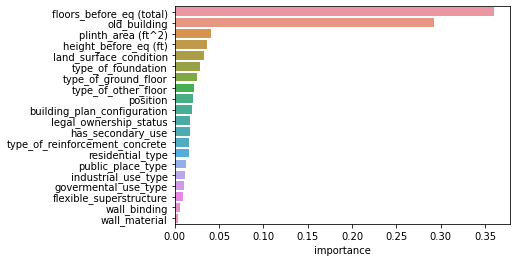

In [ ]:
imp = pd.DataFrame(xgb.feature_importances_, index=X_train.columns, columns=["importance"])
imp.sort_values("importance", ascending=False)

sns.barplot(x="importance", y=imp.index, data=imp.sort_values("importance", ascending=False))